# Lecture 2

## Exercise 2.1

- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi \frac{x}{2}) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $N$ ($N = 10^4$) as a function of the number of blocks.

### Implementation

In [200]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [201]:
path1 = "OUTPUT/es1_pi_HoM.txt"
path2 = "OUTPUT/es1_pi_IS.txt"
path3 = "OUTPUT/es1_error_HoM.txt"
path4 = "OUTPUT/es1_error_IS.txt"
v_pi_HoM = np.loadtxt(path1)
v_error_HoM = np.loadtxt(path3)
v_pi_IS = np.loadtxt(path2)
v_error_IS = np.loadtxt(path4)

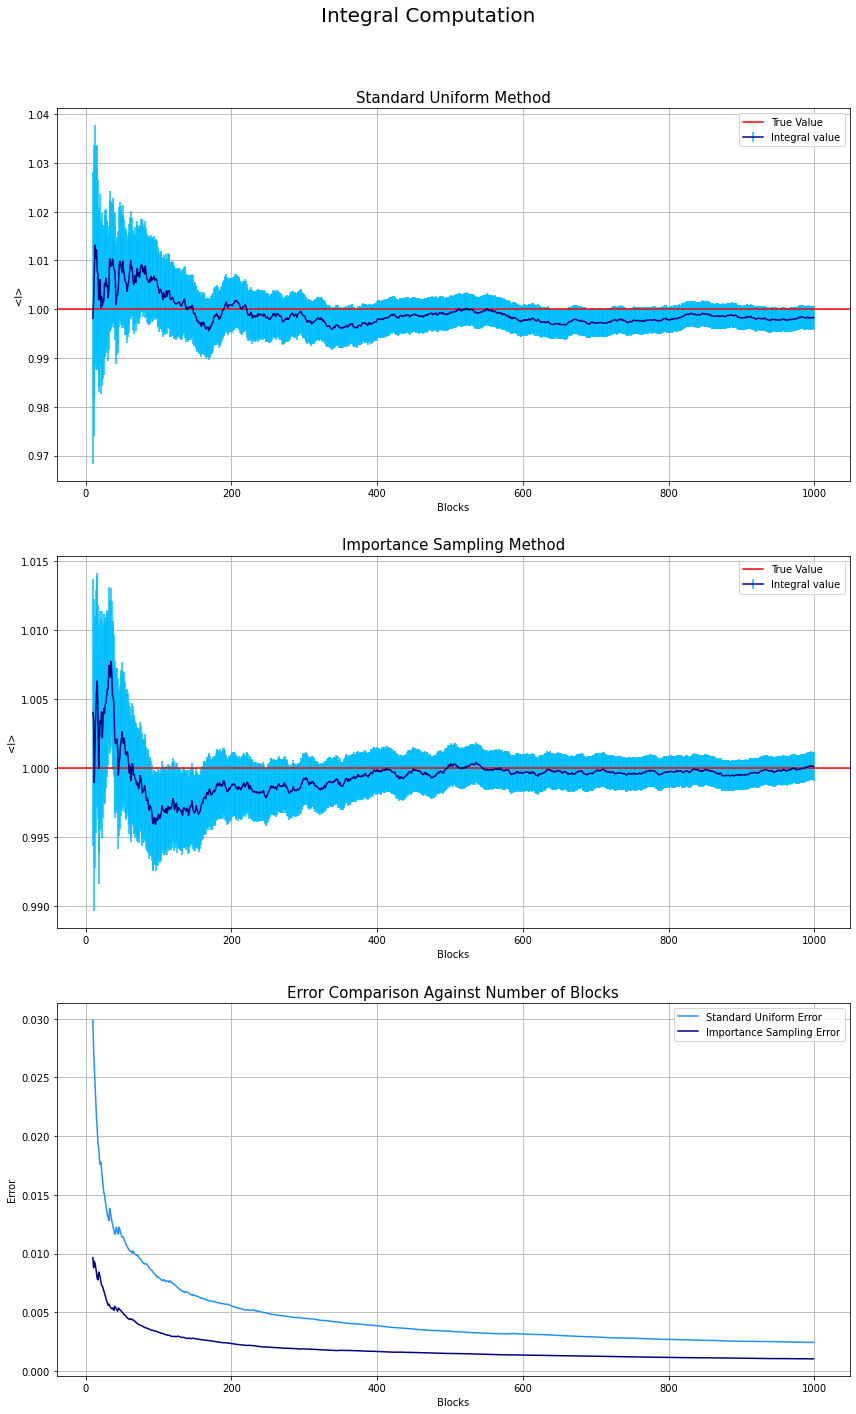

In [207]:
k = 10   # This excludes the first k values from the plot
x = np.arange(k, len(v_pi_HoM))
plt.figure(figsize=(12, 20))
plt.suptitle("Integral Computation", fontsize=20)

plt.subplot(3, 1, 1)
plt.errorbar(x, v_pi_HoM[k:], yerr=v_error_HoM[k:], fmt='-', color='navy', ecolor='deepskyblue', label="Integral value")
plt.axhline(y=1, color='red', linestyle='-', label='True Value')
plt.xlabel('Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.legend()
plt.title("Standard Uniform Method", fontsize=15)

plt.subplot(3, 1, 2)
plt.errorbar(x, v_pi_IS[k:], yerr=v_error_IS[k:], fmt='-', color='navy', ecolor='deepskyblue', label="Integral value")
plt.axhline(y=1, color='red', linestyle='-', label='True Value')
plt.xlabel('Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.legend()
plt.title("Importance Sampling Method", fontsize=15)

plt.subplot(3, 1, 3)
plt.plot(x, v_error_HoM[k:], "-", label='Standard Uniform Error', color='dodgerblue')
plt.plot(x, v_error_IS[k:], "-", label='Importance Sampling Error', color='navy')
plt.xlabel('Blocks')
plt.ylabel('Error')
plt.title("Error Comparison Against Number of Blocks", fontsize=15)
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots and suptitle
plt.subplots_adjust(hspace=0.2)  # Adjust vertical spacing between subplots

plt.show()

## Exercise 2.2

- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times ($10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

## Implementation

The plots illustrate the value of $\sqrt{\langle r^2 \rangle}$ (the average distance from the origin) as a function of the number of random walk steps. This demonstrates a behavior proportional to the square root of the number of steps, $\sqrt{N}$.


- **Number of Blocks:** 100
- **Samples per Block:** 100
- **Total Samples:** 10,000
- **Number of Random Walk Steps:** 100

In [203]:
def func(x, a, b):
    return b + a * np.sqrt(x)

Avg_D_RW = np.loadtxt("OUTPUT/es2_Avg_D.txt")
Error_D_RW = np.loadtxt("OUTPUT/es2_Error_D.txt")
Avg_C_RW = np.loadtxt("OUTPUT/es2_Avg_C.txt")
Error_C_RW = np.loadtxt("OUTPUT/es2_Error_C.txt")

x = np.arange(1, len(Avg_D_RW) + 1)

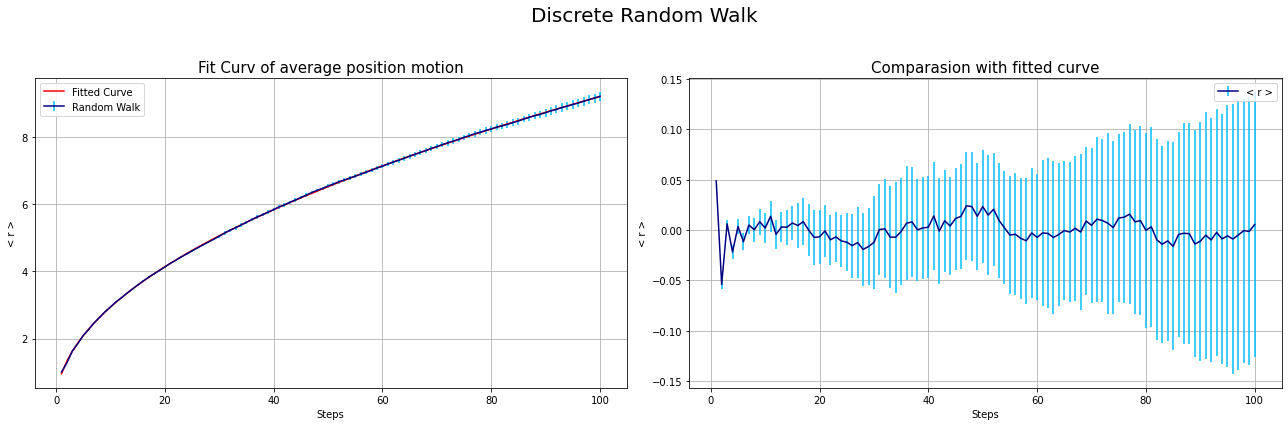

In [204]:
popt_D, pcov_D = curve_fit(func, x, Avg_D_RW)

plt.figure(figsize=(18, 6))
plt.suptitle("Discrete Random Walk", fontsize=20)

plt.subplot(1, 2, 1)
plt.errorbar(x, Avg_D_RW, color='navy', yerr = Error_D_RW, ecolor='deepskyblue', label='Random Walk')
plt.plot(x, func(x, *popt_D), 'r-', label='Fitted Curve')
plt.xlabel('Steps')
plt.ylabel('< r >')
plt.grid(True)
plt.legend()
plt.title("Fit Curv of average position motion", fontsize=15)

plt.subplot(1, 2, 2)
plt.errorbar(x, Avg_D_RW - func(x, *popt_D), color='navy', yerr = Error_D_RW, ecolor='deepskyblue', label='< r >')
plt.xlabel('Steps')
plt.ylabel('< r >')
plt.grid(True)
plt.legend()
plt.title("Comparasion with fitted curve", fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots and suptitle
plt.subplots_adjust(hspace=0.2)  # Adjust vertical spacing between subplots
plt.show()

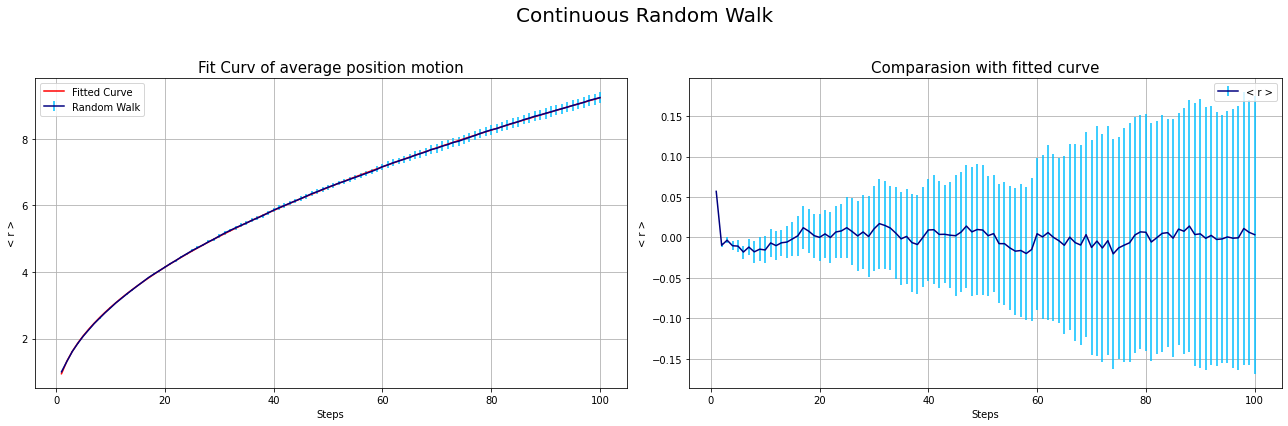

In [205]:
popt_C, pcov_C = curve_fit(func, x, Avg_C_RW)

plt.figure(figsize=(18, 6))
plt.suptitle("Continuous Random Walk", fontsize=20)

plt.subplot(1, 2, 1)
plt.errorbar(x, Avg_C_RW, color='navy', yerr = Error_C_RW, ecolor='deepskyblue', label='Random Walk')
plt.plot(x, func(x, *popt_C), 'r-', label='Fitted Curve')
plt.xlabel('Steps')
plt.ylabel('< r >')
plt.grid(True)
plt.legend()
plt.title("Fit Curv of average position motion", fontsize=15)

plt.subplot(1, 2, 2)
plt.errorbar(x, Avg_C_RW - func(x, *popt_C), color='navy', yerr = Error_C_RW, ecolor='deepskyblue', label='< r >')
plt.xlabel('Steps')
plt.ylabel('< r >')
plt.grid(True)
plt.legend()
plt.title("Comparasion with fitted curve", fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots and suptitle
plt.subplots_adjust(hspace=0.2)  # Adjust vertical spacing between subplots
plt.show()

The plots clearly show that both discrete and continuous random walks exhibit diffusive behavior, with a proportionality constant of 1 (0.91820734 and 0.92082146 for discrete RW and continuous RW respectively). the distance from the origin increases rapidly, but over time, the steps tend to cancel each other out, leading to slower growth in distance